# Simple Deep Learning Neural Net using Keras
The goal of this notebook is to define and train a very simple NN using Keras, make some health related prediction using a given dataset, and play a little bit with the parameters and plots. Contrary to the other repo, we'll split the dataset into train and test sets.
* Sources : 
    * https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
    * https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

### Installing libraries (if needed)

In [1]:
#import sys
#!{sys.executable} -m pip install keras numpy tensorflow pydot pydotplus graphviz

### Importing libraries

In [2]:
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.


### Loading data
This dataset has :
* 768 rows or 'examples'
* 9 columns

In [3]:
!ls *.csv

pima-indians-diabetes.csv


In [4]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
rows, columns = dataset.shape
print('Rows :',rows)
print('Columns :', columns)

Rows : 768
Columns : 9


### Dataset columns
We'll split it into train and test sets, with the respective proportions 90% : 10%.
#### Input X :
- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)

#### Output Y :
- Class variable (0 or 1) 

In [5]:
train_set_size = int(rows*.9)

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

print('X:', X.shape)
print('Y:', Y.shape)

# split into input (X) and output (Y) variables for train and test sets.
# SOMETIME, TRY USING 'validation_split' IN FIT FUNCTION INSTEAD.
X_train = X[:train_set_size,:]
X_test = X[train_set_size+1:,0:8]

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

Y_train = Y[:train_set_size]
Y_test = Y[train_set_size+1:]

print('Y_train:', Y_train.shape)
print('Y_test:', Y_test.shape)

X: (768, 8)
Y: (768,)
X_train: (691, 8)
X_test: (76, 8)
Y_train: (691,)
Y_test: (76,)


### Creating the model
* We have 8 inputs from X
* 1 output in Y
* We'll use 3 fully connected layers, the first having 12 neurons for 8 inputs, then 8 neurons, and finally 1 for the binary output prediction.
* We'll leave the default weight initialization.

In [6]:
def MyModel(input_shape):
    X_input = Input(input_shape)
    x = Dense(12, activation='relu', name='Layer1')(X_input)
    x = Dense(8, activation='relu', name='Layer2')(x)
    x = Dense(1, activation='sigmoid', name='Layer3')(x)
    # The output is 'x' not 'Y' because x is the updated variable, modified after each layer.
    return Model(inputs=X_input, outputs=x, name='my model')

input_shape = (X_train.shape[1],)
model = MyModel(input_shape)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Training the Neural Net on the train set
* A.k.a fitting the model.
* `epochs` is the number of times the training data is passed through the neural net. 
* `batch_size` is the number of training example let throught the net at each forward/backward propagation step. Weights are updated after each step. Convergence should be faster.
* Verbosity is turned off.

In [7]:
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

Instructions for updating:
Use tf.cast instead.


### Evaluating the Neural Net
We can evaluate the model, both on training set and test set, in order to detect overfitting and bias/variance problems.

In [8]:
train_scores = model.evaluate(X_train, Y_train)
test_scores = model.evaluate(X_test, Y_test)
print("Train: %s: %.2f%%" % (model.metrics_names[1], train_scores[1]*100))
print("Test:  %s: %.2f%%" % (model.metrics_names[1], test_scores[1]*100))

76/76 [==============================] - 0s 66us/step
Train: acc: 75.25%
Test:  acc: 73.68%


### Making predictions
Predictions are rounded towards 0 or 1 to get a clean result, because as the output comes from the sigmoid function, it will be some value anywhere between 0 and 1.

In [9]:
# calculate predictions
predictions = model.predict(X_test)
# round predictions
rounded = [int(round(x[0])) for x in predictions]
# show the 15 first predictions
print(rounded[:15], '...')

[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0] ...


### Variation on the train/test split, displaying training history

The evolution of the Loss and Accuracy can be followed as it evolves after each epoch. For this, we'll do things a bit differently regarding the train and test test, using the `validation_split` parameter to take care of it. It is the fraction of the training data to be used as validation data.

In [10]:
input_shape = (X.shape[1],)
model2 = MyModel(input_shape)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model2.fit(X, Y, validation_split=0.33, epochs=300, batch_size=10, verbose=0)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


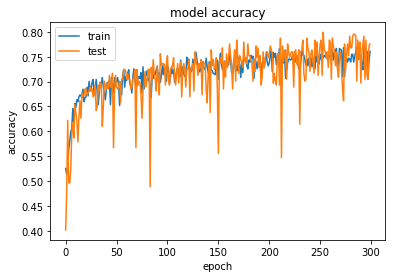

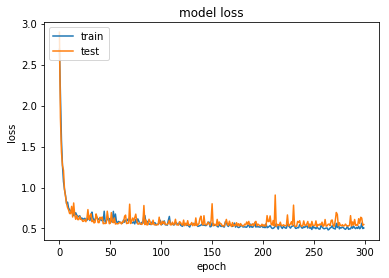

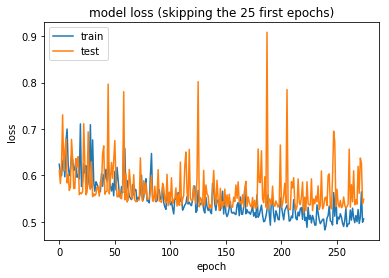

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss -- skip first
plt.plot(history.history['loss'][25:])
plt.plot(history.history['val_loss'][25:])
plt.title('model loss (skipping the 25 first epochs)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

If the model is overfitting the graph will show great performance on the training data and poor performance on the test data.

### Neural Network graph

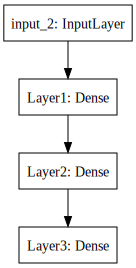

In [13]:
from IPython.display import SVG
import pydot
#from keras.utils import model_to_dot
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model2).create(prog='dot', format='svg'))